<a href="https://colab.research.google.com/github/Stella-kimani/Week-7_IP_Stella/blob/master/Stella_Kimani_week7_independent_project_30_07_2020_python_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.Overview

Research question

Study the factors that affect housing prices, and then create a model that would allow the company to accurately predict the sale of prices given certain predictor variables.



2.Metric for success

The metric for success will be determined by building models that are optimized from the linear models using Quantile regression,Lasso Regression,Ridge regression and Elastic net regression. 

3.Understanding the context

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 





4.Recording experimetal design

The flow for the assessment:

1.Loading the necessary libraries to be used.

2.Data cleaning and preparation.Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.

3.Perform any necessary feature engineering

4.Performing regression analysis.
Incorporate categorical independent variables into your models.

5.Check for multicollinearity

6.Create residual plots for my models, and assess heteroskedasticity using Barlett's test.

7.Challenge the solution by providing insights on how i can make improvements in model improvement.
Types of Regression analysis to use. 

 1.Multiple Linear Regression

 2.Quantile Regression

 3.Ridge Regression

 4.Lasso Regression

 5.Elastic Net Regression


This helps us understand the dataset better

id : Unique notation for each house sold (primary key of the dataset)

date: Date house was sold

price: Price of the house (our prediction target)
bedrooms: Number of bedrooms
bathrooms: Number of bathrooms, where 0.5 accounts for a room with a toilet but no shower

sqft_living: Square footage of the home

sqft_lot: Square footage of the lot

floors :Total floors (levels) in house
waterfront :House which has a view to a waterfront
view: boolean feature (True (1) if the house has been viewed, False (0) if the house has not been viewed)
condition :How good the condition is overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above : Square footage of house apart from basement
sqft_basement: Square footage of the basement

yr_built : year the house was built

yr_renovated : Year when the house was renovated

zipcode: Zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 : LotSize area in 2015(implies-- some renovations)



External Validation

This data is valid and can be found here.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

https://rdrr.io/cran/moderndive/man/house_prices.html

#1.Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
!pip install pydataset
from pydataset import data
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler
import random
sns.set()


In [3]:
#Loading the dataset
house_df = pd.read_csv('house_data.csv')


In [3]:
#Previewing the first 5 entries
house_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [221]:
#Previewing the bottom of our dataset
house_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [222]:
#Checking the shape of the data set(rows and columns)
house_df.shape

(21613, 20)

There are 21613 rows and 20 columns in the dataset

In [ ]:
# checking the column names of our dataset
house_df.columns
#This shows the all my 20 columns in the house data dataset

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Understanding datatypes the dataset
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  float64
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  float64
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  float64
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

This gives me an overview of the types of datatypes i have. It seems am working with integers and float datatypes

#2.Data preparation and cleaning 

In [ ]:
#Looking for null values
house_df.isnull().sum()
#The dataset has no null values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# check for duplicates in fifa dataset
house_df.duplicated().sum()
#My dataset has duplicates.

3

In [5]:
# Drop the duplicates in house dataset
house_df = house_df.drop_duplicates()

In [6]:
#Recheck if duplicates in my dataset have been dropped
house_df.duplicated().sum()

0

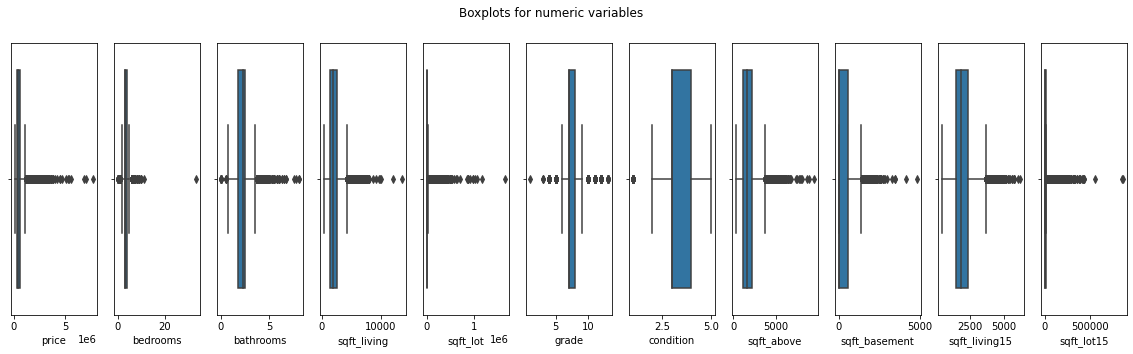

In [ ]:
#checking for outliers

fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11)) = plt.subplots(1,11, figsize=(20, 5))
fig.suptitle('Boxplots for numeric variables')
sns.boxplot(house_df['price'], ax=ax1)
sns.boxplot(house_df['bedrooms'], ax=ax2)
sns.boxplot(house_df['bathrooms'], ax=ax3)
sns.boxplot(house_df['sqft_living'], ax=ax4)
sns.boxplot(house_df['sqft_lot'], ax=ax5)
sns.boxplot(house_df['grade'], ax=ax6)
sns.boxplot(house_df['condition'], ax=ax7)
sns.boxplot(house_df['sqft_above'], ax=ax8)
sns.boxplot(house_df['sqft_basement'], ax=ax9)
sns.boxplot(house_df['sqft_living15'], ax=ax10)
sns.boxplot(house_df['sqft_lot15'], ax=ax11)


plt.show()


There are a number of outliers in the columns,since my model is predictive i will not drop any outlier in the columns.

In [6]:
#Checking whether i have appropriate datatypes
house_df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
#These columns are unnecessary.
house_df = house_df.drop(columns=['id', 'lat', 'long'])

#Exploratory Data Analysis

In [10]:
#Let me get to understand some statistical summary for my dataframe

house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,1.749745,2079.881212,1.510829e+04,1.446136,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,1986.518695,12769.031976
std,3.673876e+05,0.930110,0.734902,918.500299,4.142323e+04,0.551893,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,685.425781,27305.972464
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.000000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.619000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [64]:
# Showing mean and standard deviation
for column in house_df.columns:
  print('\n')
  print(column+ ' has a kurtosis of '+ str(house_df[column].kurtosis()))
  print(column+ ' has a standard deviation of '+ str(house_df[column].std()))
  print(column+ ' has a skewness of '+ str(house_df[column].skew()))



price has a kurtosis of 34.517437729615054
price has a standard deviation of 367387.58505388984
price has a skewness of 4.021467451317612


bedrooms has a kurtosis of 49.06010825423431
bedrooms has a standard deviation of 0.9301096999846462
bedrooms has a skewness of 1.9742435470953739


bathrooms has a kurtosis of 1.9893616645626904
bathrooms has a standard deviation of 0.7349024521327884
bathrooms has a skewness of 0.9021208866389637


sqft_living has a kurtosis of 5.242222911342459
sqft_living has a standard deviation of 918.5002986169898
sqft_living has a skewness of 1.4715321846904306


sqft_lot has a kurtosis of 285.0406214916321
sqft_lot has a standard deviation of 41423.2267370033
sqft_lot has a skewness of 13.059170061304911


floors has a kurtosis of -0.5508017231881506
floors has a standard deviation of 0.5518932517458218
floors has a skewness of 0.7265579373179887


waterfront has a kurtosis of 127.6140895994763
waterfront has a standard deviation of 0.08652315751754107
w

This summary of kurtosis and standard deviation,and kurtosis of the columns .

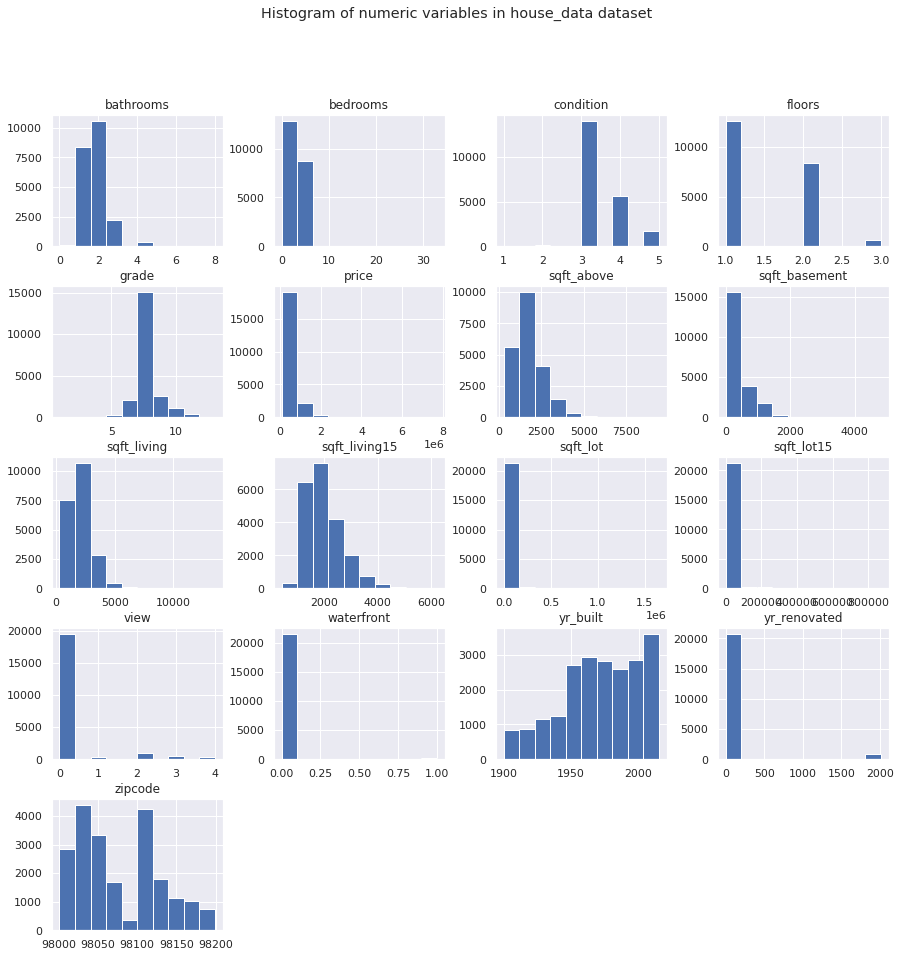

In [135]:
house_df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables in house_data dataset")
plt.savefig('Histogram')
plt.show()

From my plots the plot of sqft_living, sqft_living15, sqft above are positively skewed meaning observations mostly lie to the right.There are also outliers in these columns which would be expected.

The year built column is negatively skewed which means there are outliers in this column as well.

Determining their possible negative effect will be time consuming and in the real data sets there will always be some outliers like some luxury house prices in this dataset. That's why I am not planning to remove outliers.



In [136]:
# Plotting histograms for our numerical variables
sns.set(rc={'figure.figsize':(10,5)})
fig, ((ax1),(ax2),(ax3),(ax4)) 
sns.distplot(house_df['sqft_living'], kde= True,color= 'purple', ax=ax1)
sns.distplot(house_df['bedrooms'], kde= True,color= 'blue', ax=ax2)
sns.distplot(house_df['bathrooms'], kde= True,color= 'orange', ax=ax3)
sns.distplot(house_df['price'], kde= True, color='Pink', ax=ax4) 


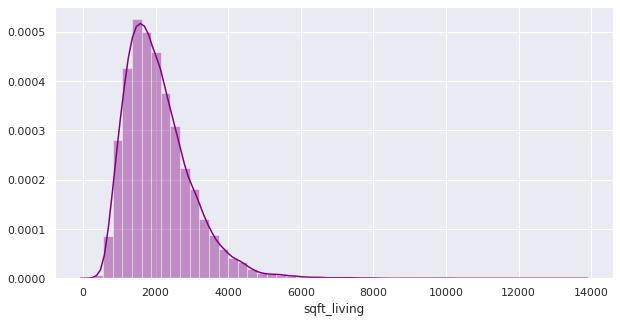

In [137]:
sns.distplot(house_df['sqft_living'], kde= True,color= 'purple')

This shows that the plot is positively skewed,there are outliers in this column and the plot shows that the distribution has thin tails.
sqft_living column has a kurtosis of 5.242222911342459
sqft_living has a standard deviation of 918.5002986169898


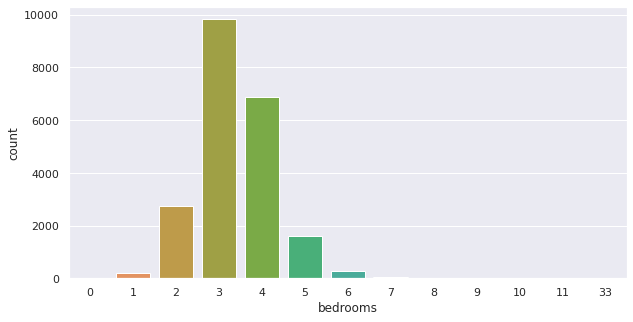

In [118]:
sns.countplot(house_df['bedrooms'])

It seems the 3 bedroom house is most popular interms of the count  and a 1 bedroom house is the least popular.
There are no houses with no bedrooms.

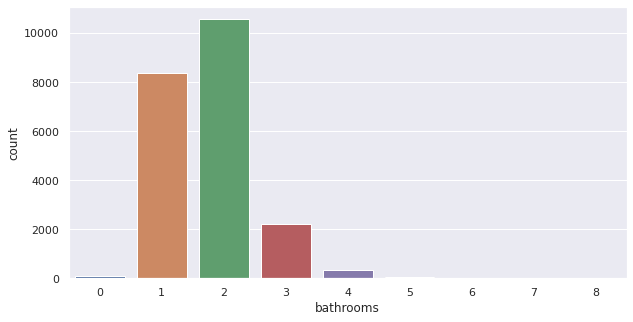

In [119]:
sns.countplot(house_df['bathrooms'])

It seems that houses with 2 bathrooms have the highest count and the houses with 0 bathrooms have the least count.

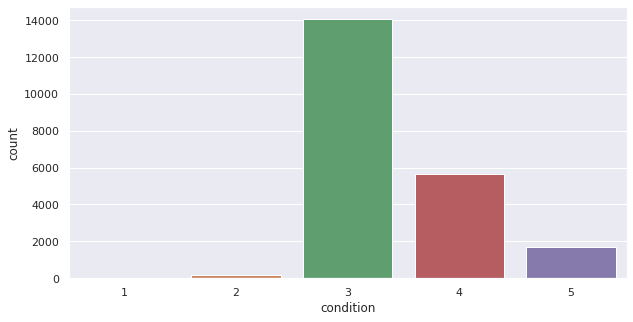

In [121]:
sns.countplot(house_df['condition'])

Houses that have a condition of 3 seem to have the highest count, even though 5 is a higher rate of the condition of the house/apartment.

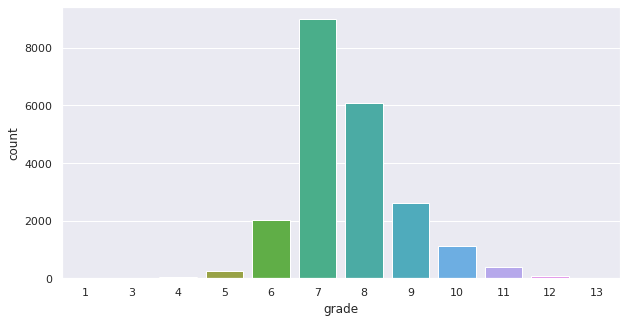

In [122]:
sns.countplot(house_df['grade'])

A grade of 7 has the highest count while 12 has possibly the lowest count.

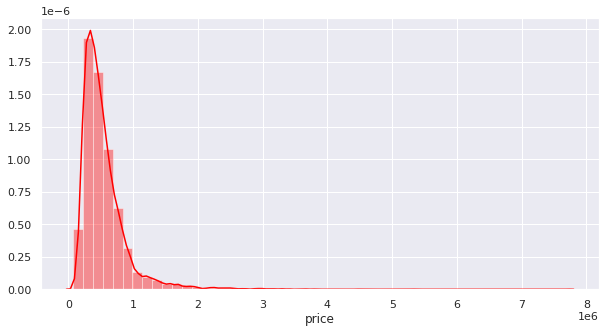

In [110]:
# Ditribution plot for price column

sns.distplot(house_df['price'], kde= True,color='red')

The plot shows that price column is positively skewed, due to outliers
price has a kurtosis of 34.517437729615054
price has a standard deviation of 367387.58505388984
price has a skewness of 4.021467451317612


Bi variate Analysis

bedrooms
8     1.105077e+06
7     9.514478e+05
9     8.939998e+05
6     8.258535e+05
10    8.200000e+05
5     7.868741e+05
33    6.400000e+05
4     6.355771e+05
11    5.200000e+05
3     4.662555e+05
0     4.102231e+05
2     4.013877e+05
1     3.176580e+05
Name: price, dtype: float64

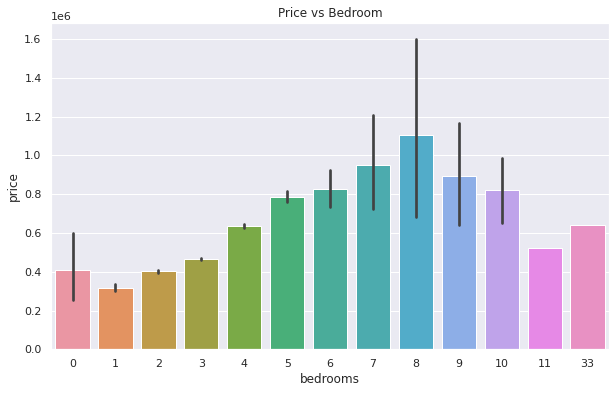

In [104]:
# Plotting price against the bedrooms to see relationships
plt.title("Price vs Bedroom")
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='bedrooms', y='price', data = house_df)
house_df.groupby('bedrooms')['price'].mean().sort_values(ascending=False)

The price of an 8 bedroom house is the highest, and the lowest is a one bedroom house.

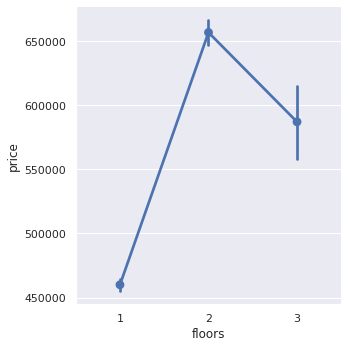

In [112]:
# Plotting a pairplot of our variables
sns.catplot(x="floors",y="price",kind="point",data=house_df)

A house with 2 floors seems to be mpst expensive from my catplot

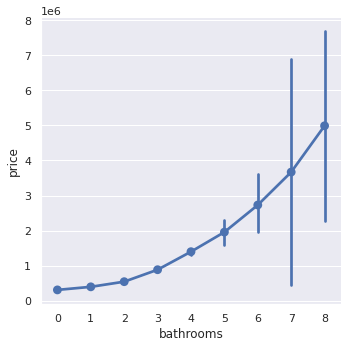

In [114]:
sns.catplot(x="bathrooms",y="price",kind="point",data=house_df)

A house that has 8 bathrooms is more expensive than one with no bathrooms. There is a positive relationship between the number of bathrooms and price of that house.

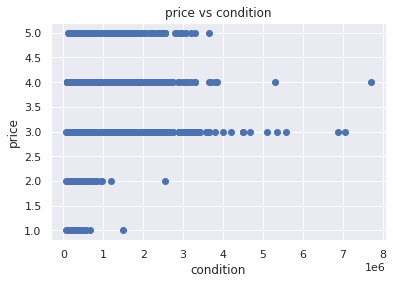

In [11]:
# Plotting our scatterplot
plt.scatter(house_df['price'], house_df['condition'])

# Giving our scatterplot a title
plt.title('price vs condition')

# Labelling our x axis
plt.xlabel('condition')

# Labelling our y axis
plt.ylabel('price')

# Displaying our scatterplot
plt.show()

Again it seems that a house rated 3 seeems to be more expensive.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


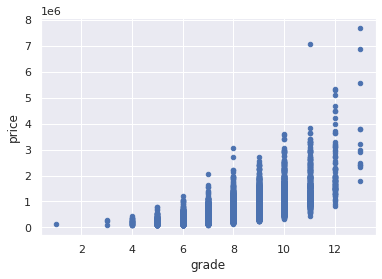

In [13]:
house_df.plot(x = 'grade', y = 'price', kind='scatter')

There is an increase in price as the grade of the house increases.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


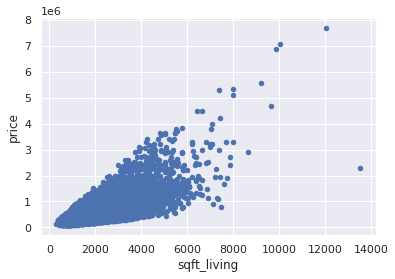

In [15]:
#Plot of square foot of living room vs price.
house_df.plot(x = 'sqft_living', y = 'price', kind='scatter')

From my scatter plot, price is highly correlated with square foot living column.The increase of price causes increase in square feet of the living room.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


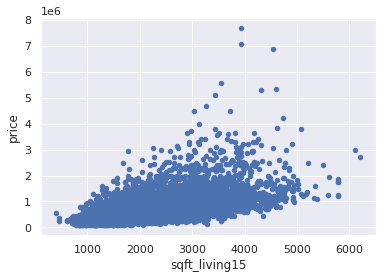

In [16]:
#Plotting sqft_living15 column vs price of the house
house_df.plot(x = 'sqft_living15', y = 'price', kind='scatter')

Although there is a somewhat linear relationship between price and sqftliving15 column,it is not as strong as the relationship between price and sqft_living column.
An increase in price will lead to an increase in sqft_living15.

#Multicolinearity

In [13]:
correlation = house_df.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.510096,0.702046,0.089658,0.237215,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.585382,0.082457
bedrooms,0.308346,1.000000,0.467519,0.576674,0.031699,0.155663,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,0.391633,0.029233
bathrooms,0.510096,0.467519,1.000000,0.697914,0.085313,0.484886,0.058799,0.177497,-0.125962,0.606661,0.639963,0.250920,0.433608,0.060698,-0.159755,0.510106,0.080794
sqft_living,0.702046,0.576674,0.697914,1.000000,0.172830,0.353327,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.085313,0.172830,1.000000,-0.008919,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,0.144620,0.718556
floors,0.237215,0.155663,0.484886,0.353327,-0.008919,1.000000,0.019654,0.024528,-0.293188,0.472577,0.517903,-0.235802,0.578663,-0.007979,-0.096645,0.296537,-0.013232
waterfront,0.266332,-0.006583,0.058799,0.103820,0.021601,0.019654,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,0.086469,0.030702
view,0.397466,0.079433,0.177497,0.284641,0.074753,0.024528,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.280404,0.072577
condition,0.036397,0.028422,-0.125962,-0.058768,-0.008967,-0.293188,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.092854,-0.003424
grade,0.667478,0.357003,0.606661,0.762719,0.113644,0.472577,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.713208,0.119265


In [14]:
VIF=pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
VIF

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,2.904985,0.283587,-0.315271,-5.486625e-01,0.002634,-0.102882,-0.397575,-0.261696,-0.105936,-1.118233,-5.422070e-01,-3.130487e-01,0.828353,-0.031191,0.005118,-0.140589,0.117915
bedrooms,0.283587,1.647665,-0.318353,-8.612437e-01,0.051157,0.067510,0.022804,0.080232,-0.075390,0.178181,-2.795761e-01,-1.748549e-01,0.111809,0.020990,0.082664,0.023674,0.105089
bathrooms,-0.315271,-0.318353,2.444319,-1.589459e+00,-0.026360,-0.509366,0.059194,-0.007794,-0.028686,-0.054027,5.542293e-01,1.086875e-01,-0.501830,-0.155453,-0.028995,0.173544,0.037833
sqft_living,-0.548844,-0.863351,-1.592066,1.805120e+13,-0.143135,-0.055412,0.000390,0.078849,-0.342706,-1.474780,-1.627533e+13,-8.698312e+12,0.652186,0.208379,-0.074777,-1.419203,-0.159963
sqft_lot,0.002634,0.051157,-0.026360,-1.429955e-01,2.091444,0.070525,0.028551,-0.058948,0.027284,-0.014074,-9.810351e-02,4.077695e-02,0.041137,0.014585,0.061697,0.140238,-1.471408
floors,-0.102882,0.067510,-0.509366,-5.196530e-02,0.070525,2.148938,0.009521,-0.031491,0.085350,-0.282630,-3.775580e-01,5.560176e-01,-0.830408,-0.127511,-0.254807,0.246947,0.111823
waterfront,-0.397575,0.022804,0.059194,1.435842e-03,0.028551,0.009521,1.257933,-0.459503,0.001436,0.198338,2.782564e-02,7.213471e-02,-0.130845,-0.061742,0.012717,0.081474,-0.032160
view,-0.261696,0.080232,-0.007794,7.719576e-02,-0.058948,-0.031491,-0.459503,1.443505,-0.019101,-0.068264,5.923755e-02,-2.420153e-01,0.070265,-0.038356,-0.141317,-0.287398,-0.015079
condition,-0.105936,-0.075390,-0.028686,-3.421370e-01,0.027284,0.085350,0.001436,-0.019101,1.245166,-0.003869,3.603337e-01,5.994673e-02,0.474628,0.196574,0.179678,0.085361,-0.031794
grade,-1.118233,0.178181,-0.054027,-1.475840e+00,-0.014074,-0.282630,0.198338,-0.068264,-0.003869,3.663830,1.816246e-01,3.630619e-01,-0.780327,-0.042121,-0.148740,-0.802509,0.069387


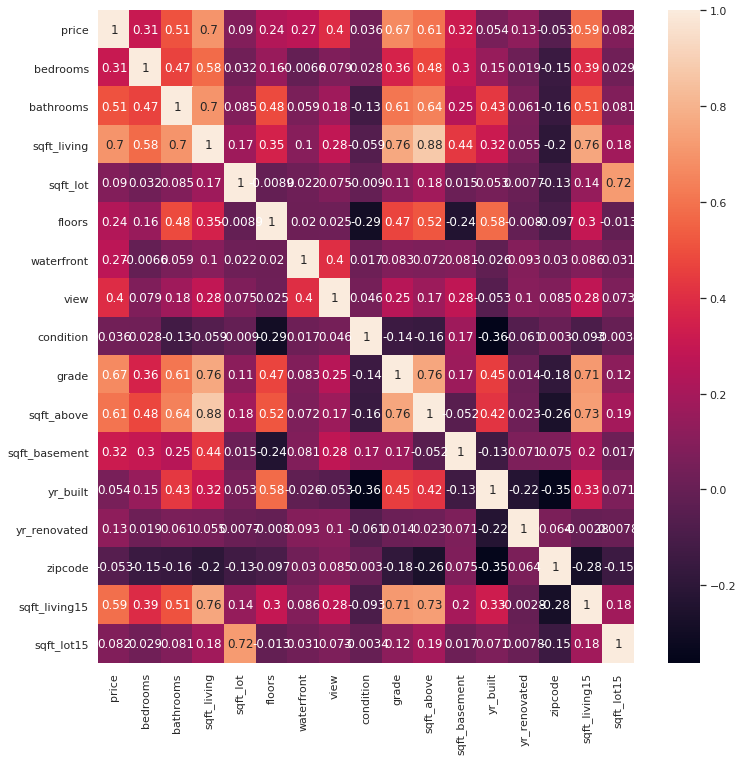

In [140]:
# Plotting visualisation of the matrix for better clarity 

plt.figure(figsize=(12, 12))  

# Creating our visualisation  
# 
sns.heatmap(correlation, annot = True) 

From the heatmap,

the self relation is 1 as always. this is the relation of a variable to itself
price is highly correlated to Price of square foot living room and grade of the house and very low correlation with zip code.


Multiple Regression

In [21]:
#Model training the Baseline model.
X = house_df.drop(['price'], axis=1)
y = house_df['price']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
regressor = LinearRegression()
regressor.fit(X,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

#Checking difference between the actual and predicted 
diff = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
diff.head()



,Actual,Predicted
13410,269000.0,156978.412344
13564,299000.0,297527.610305
14037,1080000.0,892774.262169
5586,365000.0,333677.198723
7969,500000.0,617747.089061


The table above shows the difference between the actual and predicted values in the model.

In [36]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

residuals.mean()

              price
count  4.322000e+03
mean  -1.960552e+03
std    2.204302e+05
min   -3.952548e+06
25%   -9.119888e+04
50%    1.121968e+04
75%    1.088822e+05
max    1.150001e+06


-1960.5518259149667

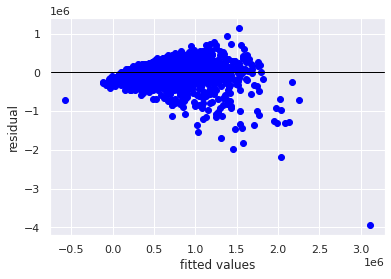

In [37]:
# a plot to find the residual plot
plt.scatter(y_pred, residuals, color='Blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=1)
plt.show()

I  notice that the mean is centered around 0 and most of our data is close to this value but we do have some on the negative side that are far from this mean. To find if there are any patterns in the data we perfom a heteroskedasticity test.

**Test for heteroskedasticity**


In [38]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
1.890274162963798e-87
the variances are homogeneous!


 Using bartlett's test establishes a null hypothesis that the variance is equal for all our datapoints, and the alternate hypothesis that the variance is different for at least one pair of datapoints.



In [39]:
## Creating a linear regression model regression on the above dataset
#
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = True)
model1.fit(X, y)

y_pred1 = model1.predict(X)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(X, y)))


Mean squared error: 46460610391.35
Variance score: 0.66


This is a high variance, let me try reduce it using Quantile regression

#Quantile Regression

In [28]:
# prepare the quantile that we want to work with
#quantile reg
import statsmodels.formula.api as smf
quantiles = np.arange(0.1,1,0.1)
models = []
params = []
# loop to change the columns
for i in np.arange(0,12,1):
  x = X.iloc[:,i]
  mod = smf.quantreg('y ~ x', house_df)
  # loop to calculate the quantile data
  for qt in quantiles:
    
    res = mod.fit(q = qt)
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/

      qt     intercept        x_coef  cf_lower_bound  cf_upper_bound
0    0.1  1.198000e+05  4.005000e+04    3.723010e+04    4.286990e+04
1    0.2  1.350000e+05  5.000000e+04    4.709034e+04    5.290966e+04
2    0.3  1.497500e+05  6.105000e+04    5.763913e+04    6.446087e+04
3    0.4  1.650000e+05  7.250000e+04    6.871644e+04    7.628356e+04
4    0.5  1.800000e+05  8.500000e+04    8.101103e+04    8.898897e+04
5    0.6  1.883333e+05  1.016667e+05    9.693583e+04    1.063975e+05
6    0.7  1.895750e+05  1.227125e+05    1.178581e+05    1.275669e+05
7    0.8  1.910000e+05  1.520000e+05    1.455411e+05    1.584589e+05
8    0.9  1.500000e+05  2.150000e+05    2.031568e+05    2.268432e+05
9    0.1  1.170000e+05  8.600000e+04    8.330746e+04    8.869254e+04
10   0.2  1.309000e+05  1.070500e+05    1.040663e+05    1.100337e+05
11   0.3  1.399996e+05  1.300004e+05    1.262222e+05    1.337786e+05
12   0.4  1.532525e+05  1.532475e+05    1.489744e+05    1.575206e+05
13   0.5  1.705000e+05  1.765000e+

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [29]:
import statsmodels.formula.api as smf
res1 = mod.fit(q = 0.1)
res2 = mod.fit(q = 0.2)
res3 = mod.fit(q = 0.5)
res4 = mod.fit(q = 0.9)

# display the results 
print("10th Percentile: ", res1.summary(), '\n***************\n')
print("\n20th Percentile: ", res2.summary(), '\n***************\n')
print("\n50th Percentile: ", res3.summary(), '\n***************\n')
print("\n90th Percentile: ", res4.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


10th Percentile:                           QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.01647
Model:                       QuantReg   Bandwidth:                   3.475e+04
Method:                 Least Squares   Sparsity:                    5.162e+05
Date:                Sat, 01 Aug 2020   No. Observations:                21610
Time:                        05:18:04   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.687e+06   5.67e+04    -29.751      0.000    -1.8e+06   -1.58e+06
x            980.3885     28.756     34.093      0.000     924.025    1036.752

The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other nu

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


<Figure size 432x288 with 0 Axes>

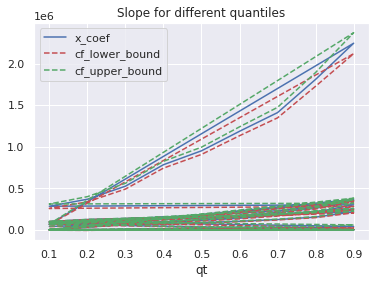

In [30]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

Advantages of Quantile 

It is quite beneficial when heteroscedasticity is present in the data.
It is robust to outliers.
The distribution of the dependent variables can be described via various quantiles.
It is more useful than linear regression when the data is skewed.

Limitation of using Quantile Regression

It is to be kept in mind that the coefficients which we get in quantile regression for a particular quantile should differ significantly from those we obtain from linear regression.
If it is not so then our usage of quantile regression isn't justifiable. This can be done by observing the confidence intervals of regression coefficients of the estimates obtained from both the regressions.

Quantile regression is not useful when their coefficients are almost similar to the multiple linear regression.

2.2 Ridge Regression

In [40]:
# Importing our libraries
# 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
a = house_df.drop(['price'], axis=1)
b = house_df['price']

In [42]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 100)

In [43]:
regression = LinearRegression()
regression.fit(a,b)
first_model = (mean_squared_error(y_true=b,y_pred=regression.predict(a)))
print(first_model)


46460610391.34634


In [44]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [45]:
search.fit(a,b)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

47132415051.6591

In [46]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(a,b)
second_model = (mean_squared_error(y_true=b,y_pred=ridge.predict(a)))
print(second_model)

46468820378.14546


There is a slight decrease in model regression MSE of 46460610391.34634, to 46468820378.14546 when i apply ridge regression. 

In [47]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,a.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 54254.301620785496,
 'bedrooms': -38559.55990427596,
 'condition': 20587.34239472947,
 'floors': 23575.676355759915,
 'grade': 120306.82754660284,
 'sqft_above': 50.7875822883434,
 'sqft_basement': 56.94081201578501,
 'sqft_living': 107.72839442994882,
 'sqft_living15': 25.9401083375069,
 'sqft_lot': -0.008042166358791292,
 'sqft_lot15': -0.546122852472763,
 'view': 43198.75661483357,
 'waterfront': 581121.2837529618,
 'yr_built': -3566.589192841477,
 'yr_renovated': 9.824883610667655,
 'zipcode': -12.097773746132248}

Lasso Regression

In [48]:
# Loading our libraries
#
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [49]:
m = house_df.drop(['price'], axis=1)
n = house_df['price']

In [50]:
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size = 0.2, random_state = 100)

regressor = LinearRegression()
regressor.fit(m,n)
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(m)
X_= scaler.transform(m)

In [51]:
# Creating lasso object
# 
from sklearn import linear_model
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(m, n) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(m, n)) 
print("lasso MSE:", mean_squared_error(n, lasso.predict(m))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6557641816609983
lasso MSE: 46460610552.90048
lasso coef: [-3.85584858e+04  5.42507759e+04  2.94338508e+02 -8.04996700e-03
  2.35704747e+04  5.80968376e+05  4.32043680e+04  2.05845382e+04
  1.20305240e+05 -1.35818025e+02 -1.29668017e+02 -3.56652930e+03
  9.82750449e+00 -1.20882881e+01  2.59396133e+01 -5.46124517e-01]


In [52]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(m_train, n_train) 
linear.fit(m_train, n_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(m_test, n_test))
print("linear score:", linear.score(m_test, n_test)) 
print("lasso MSE:", mean_squared_error(n_test, gridlasso.predict(m_test)))
print("linear MSE:", mean_squared_error(n_test, linear.predict(m_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6626119130843948
linear score: 0.6626122052069812
lasso MSE: 45882083969.04955
linear MSE: 45882044242.711975
lasso best estimator coef: [-3.98548973e+04  5.29903736e+04  2.98477229e+02 -7.02957414e-03
  2.77741225e+04  5.22445624e+05  4.47081460e+04  1.85918919e+04
  1.20093405e+05 -1.38354635e+02 -1.25974660e+02 -3.58410790e+03
  6.78669204e+00 -3.81665101e+01  2.19358310e+01 -5.38329800e-01]
linear coef: [-3.98549996e+04  5.29907445e+04  1.10874862e+02 -7.02882733e-03
  2.77746287e+04  5.22459587e+05  4.47075855e+04  1.85921641e+04
  1.20093553e+05  4.92472899e+01  6.16275724e+01 -3.58411399e+03
  6.78640651e+00 -3.81673981e+01  2.19358797e+01 -5.38329626e-01]


The basemodel MSE is 46460610552.90048 and after applying lasso regression it has reduced to 45882083969.04955.

In Lasso regression, if a group of predictors is highly correlated, lasso picks only one of them and shrinks the others to zero. 
This is a limitation that is taken care of in Elastic net Regression.

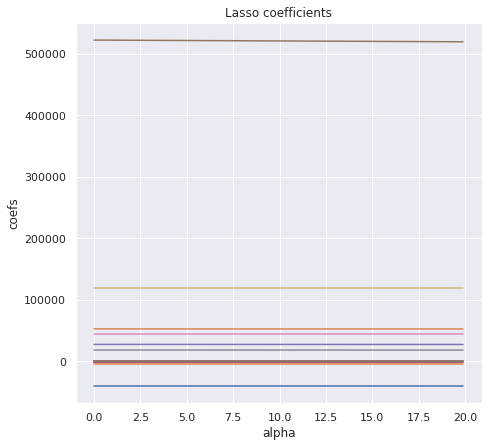

In [53]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(m_train, n_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

As we can see, Lasso influences less on the large coefficients,  the small ones Lasso reduces to zeroes. 
Therefore Lasso can also be used to determine which features are important 
to me and keeps the features that may influence the target variable

Elastic net regression

Some advantages of this regression is that,On top of the least-squares method, it introduces a penalty on regression coefficients which is a convex combination of lasso and ridge penalty.
It encourages group effect in case of highly correlated variables. 
There are no limitations on the number of selected variables.

In [54]:
p = house_df.drop(['price'], axis=1)
q = house_df['price']

In [55]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(p,q)
first_model=(mean_squared_error(y_true=q,y_pred=regression.predict(p)))
print(first_model) 

# This mean standard error score of 46460610391 is our benchmark for determining 
# if the elastic net model will be better or worst. 

46460610391.34634


In [56]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,p.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 54254.301620785496,
 'bedrooms': -38559.55990427596,
 'condition': 20587.34239472947,
 'floors': 23575.676355759915,
 'grade': 120306.82754660284,
 'sqft_above': 50.7875822883434,
 'sqft_basement': 56.94081201578501,
 'sqft_living': 107.72839442994882,
 'sqft_living15': 25.9401083375069,
 'sqft_lot': -0.008042166358791292,
 'sqft_lot15': -0.546122852472763,
 'view': 43198.75661483357,
 'waterfront': 581121.2837529618,
 'yr_built': -3566.589192841477,
 'yr_renovated': 9.824883610667655,
 'zipcode': -12.097773746132248}

In [57]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [58]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(p,q)
search.best_params_
abs(search.best_score_)

47186242146.97204

This shows that my base model MSE is lower than the best score by Elastic net regression.

In [63]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.75 
# With these settings we got an MSE of 46649614670.61419 This is above our baseline model of MSE 46460610391.34634  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.75)
elastic.fit(p,q)
second_model=(mean_squared_error(y_true=q,y_pred=elastic.predict(p)))
print(second_model)

46649614670.61419


In [60]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,p.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the similar to the base model.
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 24351.921020953523,
 'bedrooms': 9220.763173027737,
 'condition': 5752.311541898482,
 'floors': 12232.791024181248,
 'grade': 22568.802846839957,
 'sqft_above': 26.92589996584545,
 'sqft_basement': 30.670710808867863,
 'sqft_living': 29.010266207883397,
 'sqft_living15': 31.405755737391164,
 'sqft_lot': 0.05223262038177858,
 'sqft_lot15': 0.053108489228106175,
 'view': 21999.48169148306,
 'waterfront': 143676.13729181586,
 'yr_built': -129.09805932996605,
 'yr_renovated': 14.946801729789765,
 'zipcode': 9.62369770825078}

One limitation of elastic net regression is tht it can suffer from double shrinkage, which leads to increased bias and poor predictions. 

#Challenging my solution

1.The bathrooms and floors had float type datatypes, i did not change these data types.I understand from my glossary that bathrooms - Number of bathrooms, where 0.5 accounts for a room with a toilet but no shower


2.With these regression models, i am getting very  huge Mean squared error values,this is because i did not remove outliers and some regression like ridge regression assume constant variance which means no outliers.
Other optimization methods such as Random Forest may work better for this project.

#Conclusion

From the results  i can see that lasso and Quantile regression perform a bit better in terms of MSEs, in order to get best results other  optimazation  methods like Random Forest could be better.Regression models have alot of limitations.